# Task 3: Create Vector Embeddings for Individual Paragraphs from Sherlock Holmes Stories

In [1]:
import os
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import chromadb
from chromadb.config import Settings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
# Seting the path for Jupyter
cleaned_folder_path = "C:/Users/kazan/Downloads/Sherlock Holmes Stories/cleaned_sherlock"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



--- Tokenization Analysis ---
Total Tokens: 2348417
Average Tokens per File: 35051.00
Max Tokens in a File: 657612
Min Tokens in a File: 4544

File-wise Token Counts:
3gab.txt: 6125 tokens
3gar.txt: 6261 tokens
3stu.txt: 6546 tokens
abbe.txt: 9228 tokens
advs.txt: 104564 tokens
bery.txt: 9766 tokens
blac.txt: 8184 tokens
blan.txt: 7788 tokens
blue.txt: 7892 tokens
bosc.txt: 9698 tokens
bruc.txt: 10764 tokens
cano.txt: 657612 tokens
card.txt: 8725 tokens
case.txt: 82669 tokens
chas.txt: 6789 tokens
cnus.txt: 575016 tokens
copp.txt: 10032 tokens
cree.txt: 7737 tokens
croo.txt: 7207 tokens
danc.txt: 9796 tokens
devi.txt: 10058 tokens
dyin.txt: 5858 tokens
empt.txt: 8776 tokens
engr.txt: 8370 tokens
fina.txt: 7231 tokens
five.txt: 7396 tokens
glor.txt: 7914 tokens
gold.txt: 9034 tokens
gree.txt: 7081 tokens
houn.txt: 59275 tokens
iden.txt: 7055 tokens
illu.txt: 9815 tokens
lady.txt: 7750 tokens
last.txt: 6129 tokens
lion.txt: 7259 tokens
lstb.txt: 67799 tokens
maza.txt: 5726 tokens
mems.t

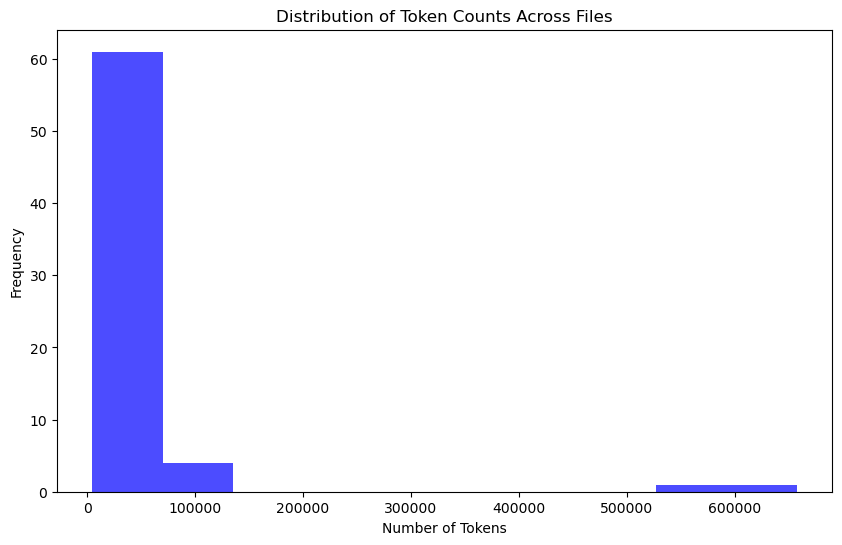

In [3]:
# Ensuring the required NLTK resources are downloaded
nltk.download('punkt')

def tokenize_and_analyze(folder_path):
    """
    Tokenizes the text in each file and performs analysis on token distributions.
    """
    token_counts = {}
    all_tokens = []
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                tokens = word_tokenize(text)  # Tokenizacja tekstu
                token_counts[file_name] = len(tokens)
                all_tokens.extend(tokens)
    
     # Display token statistics
    print("\n--- Tokenization Analysis ---")
    total_tokens = sum(token_counts.values())
    avg_tokens = total_tokens / len(token_counts)
    max_tokens = max(token_counts.values())
    min_tokens = min(token_counts.values())
    print(f"Total Tokens: {total_tokens}")
    print(f"Average Tokens per File: {avg_tokens:.2f}")
    print(f"Max Tokens in a File: {max_tokens}")
    print(f"Min Tokens in a File: {min_tokens}")
    print("\nFile-wise Token Counts:")
    for file_name, count in token_counts.items():
        print(f"{file_name}: {count} tokens")
    
    # Analysing the most frequent tokens
    token_frequency = Counter(all_tokens)
    print("\nMost Common Tokens:")
    for token, freq in token_frequency.most_common(10):
        print(f"{token}: {freq}")
    
    # Visualising token distribution across files
    plt.figure(figsize=(10, 6))
    plt.hist(token_counts.values(), bins=10, color='blue', alpha=0.7)
    plt.title("Distribution of Token Counts Across Files")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")
    plt.show()
    
    return token_counts, token_frequency

# Perform tokenization and analysis
token_counts, token_frequency = tokenize_and_analyze(cleaned_folder_path)

In [4]:
def calculate_distances(folder_path):
    """
    Calculates cosine similarity between documents based on TF-IDF representation.
    """
    documents = []
    file_names = []

    # Loading files and their content
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                documents.append(file.read())  # Read and store document text
                file_names.append(file_name)  # Store corresponding file names

    # Computing TF-IDF representation for the documents
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

    # Computing cosine similarity between all documents
    similarity_matrix = cosine_similarity(tfidf_matrix)
    print("\nCosine Similarity Matrix:")
    print(similarity_matrix)

    # Display the top similar documents for each file
    for i, file_name in enumerate(file_names):
        similar_idx = np.argsort(-similarity_matrix[i])[1:4]  # Top 3 most similar documents
        print(f"\nTop similar documents for '{file_name}':")
        for idx in similar_idx:
            print(f"   {file_names[idx]} (Score: {similarity_matrix[i][idx]:.4f})")

    return similarity_matrix

# Perform document similarity analysis
similarity_matrix = calculate_distances(cleaned_folder_path)


TF-IDF Matrix Shape: (67, 22772)

Cosine Similarity Matrix:
[[1.         0.89009383 0.88884431 ... 0.8711414  0.89170245 0.89245661]
 [0.89009383 1.         0.88210766 ... 0.8584343  0.89342139 0.87330625]
 [0.88884431 0.88210766 1.         ... 0.86890765 0.90278605 0.87862959]
 ...
 [0.8711414  0.8584343  0.86890765 ... 1.         0.9039765  0.90373499]
 [0.89170245 0.89342139 0.90278605 ... 0.9039765  1.         0.90474851]
 [0.89245661 0.87330625 0.87862959 ... 0.90373499 0.90474851 1.        ]]

Top similar documents for '3gab.txt':
   case.txt (Score: 0.9420)
   cano.txt (Score: 0.9259)
   retn.txt (Score: 0.9244)

Top similar documents for '3gar.txt':
   case.txt (Score: 0.9351)
   cano.txt (Score: 0.9207)
   lstb.txt (Score: 0.9189)

Top similar documents for '3stu.txt':
   retn.txt (Score: 0.9440)
   cano.txt (Score: 0.9379)
   cnus.txt (Score: 0.9369)

Top similar documents for 'abbe.txt':
   retn.txt (Score: 0.9633)
   cano.txt (Score: 0.9605)
   cnus.txt (Score: 0.9597)

Top

In [5]:
def split_into_paragraphs(folder_path, output_folder, sentences_per_paragraph=3):
    """
    Splits text files into paragraphs based on sentence count and saves them.

    """
    # Createing the output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    total_files_processed = 0
    total_paragraphs_saved = 0

    # Loop through each file in the given folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()

            # Spliting text into sentences
            sentences = text.split('.')
            paragraphs = []
            temp_paragraph = []

            for sentence in sentences:
                if len(sentence.strip()) > 0:  # Ignore empty sentences
                    temp_paragraph.append(sentence.strip())
                    if len(temp_paragraph) >= sentences_per_paragraph:
                        paragraphs.append(". ".join(temp_paragraph) + ".")
                        temp_paragraph = []

            # Saving the last paragraph if it exists
            if temp_paragraph:
                paragraphs.append(". ".join(temp_paragraph) + ".")

            # Saving processed paragraphs into a new file
            output_file_path = os.path.join(output_folder, file_name)
            with open(output_file_path, 'w', encoding='utf-8') as output_file:
                output_file.write("\n\n".join(paragraphs))

            # Logging results
            total_files_processed += 1
            total_paragraphs_saved += len(paragraphs)
            print(f"Processed '{file_name}': {len(paragraphs)} paragraphs saved.")

    print(f"\nAdvanced paragraph splitting complete.")
    print(f"Total files processed: {total_files_processed}")
    print(f"Total paragraphs saved: {total_paragraphs_saved}")

# Define output folder for paragraph-separated texts
paragraph_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/advanced_paragraphs"

# Split texts into paragraphs and save them
split_into_paragraphs(cleaned_folder_path, paragraph_folder_path)


Processed '3gab.txt': 1 paragraphs saved.
Processed '3gar.txt': 1 paragraphs saved.
Processed '3stu.txt': 1 paragraphs saved.
Processed 'abbe.txt': 1 paragraphs saved.
Processed 'advs.txt': 1 paragraphs saved.
Processed 'bery.txt': 1 paragraphs saved.
Processed 'blac.txt': 1 paragraphs saved.
Processed 'blan.txt': 1 paragraphs saved.
Processed 'blue.txt': 1 paragraphs saved.
Processed 'bosc.txt': 1 paragraphs saved.
Processed 'bruc.txt': 1 paragraphs saved.
Processed 'cano.txt': 1 paragraphs saved.
Processed 'card.txt': 1 paragraphs saved.
Processed 'case.txt': 1 paragraphs saved.
Processed 'chas.txt': 1 paragraphs saved.
Processed 'cnus.txt': 1 paragraphs saved.
Processed 'copp.txt': 1 paragraphs saved.
Processed 'cree.txt': 1 paragraphs saved.
Processed 'croo.txt': 1 paragraphs saved.
Processed 'danc.txt': 1 paragraphs saved.
Processed 'devi.txt': 1 paragraphs saved.
Processed 'dyin.txt': 1 paragraphs saved.
Processed 'empt.txt': 1 paragraphs saved.
Processed 'engr.txt': 1 paragraphs

In [7]:
# Debugging the contents of files before splitting into paragraphs
for file_name in os.listdir(cleaned_folder_path):  # Using the correct variable
    file_path = os.path.join(cleaned_folder_path, file_name)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Displaying the first 300 characters from the file
        print(f"\n=== Debug: File '{file_name}' Content (First 300 characters) ===")
        print(text[:300])  
        print("=" * 50)



=== Debug: File '3gab.txt' Content (First 300 characters) ===
THE THREE GABLES Arthur Conan Doyle I dont think that any of my adventures with Mr Sherlock Holmes opened quite so abruptly or so dramatically as that which I associate with The Three Gables I had not seen Holmes for some days and had no idea of the new channel into which his activities had been dir

=== Debug: File '3gar.txt' Content (First 300 characters) ===
THE THREE GARRIDEBS Arthur Conan Doyle It may have been a comedy or it may have been a tragedy It cost one man his reason it cost me a bloodletting and it cost yet another man the penalties of the law Yet there was certainly an element of comedy Well you shall judge for yourselves I remember the dat

=== Debug: File '3stu.txt' Content (First 300 characters) ===
THE THREE STUDENTS Arthur Conan Doyle It was in the year 95 that a combination of events into which I need not enter caused Mr Sherlock Holmes and myself to spend some weeks in one of our great University town

In [8]:
def generate_embeddings(paragraph_folder, output_file):
    """
    Generates embeddings for paragraphs in text files and saves them to a JSON file.
    """
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Load a pre-trained sentence transformer model
    embeddings_dict = {}

    for file_name in os.listdir(paragraph_folder):
        file_path = os.path.join(paragraph_folder, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                paragraphs = file.read().split('\n\n')  # Splitting text into paragraphs

            # Generating embeddings for each paragraph
            embeddings = model.encode(paragraphs, show_progress_bar=True)
            embeddings_dict[file_name] = {
                "paragraphs": paragraphs,
                "embeddings": embeddings.tolist()  # Convert to list for JSON compatibility
            }

    # Saving embeddings to a JSON file
    with open(output_file, 'w', encoding='utf-8') as json_file:
        json.dump(embeddings_dict, json_file)
    
    print(f"Embeddings generated and saved to '{output_file}'.")

# Path to paragraph-separated texts and output file for embeddings
embeddings_output_file = "/content/drive/My Drive/Sherlock Holmes Stories/paragraph_embeddings.json"
generate_embeddings(paragraph_folder_path, embeddings_output_file)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embeddings generated and saved to '/content/drive/My Drive/Sherlock Holmes Stories/paragraph_embeddings.json'.


In [9]:
def load_embeddings(embeddings_file):
    """
    Loads embeddings from a JSON file.
    """
    with open(embeddings_file, 'r', encoding='utf-8') as file:
        embeddings_dict = json.load(file)
    return embeddings_dict

def semantic_search(query, model, embeddings_dict, top_n=5):
    """
    Performs semantic search to find the most similar paragraphs to a query.
    """
    query_embedding = model.encode([query])  # Generate embedding for the query
    results = []

    for file_name, data in embeddings_dict.items():
        paragraphs = data["paragraphs"]
        embeddings = np.array(data["embeddings"])

        # Computing cosine similarity between query and paragraph embeddings
        similarities = cosine_similarity(query_embedding, embeddings).flatten()

        # Storing results with file name, paragraph, and similarity score
        for paragraph, similarity in zip(paragraphs, similarities):
            results.append((file_name, paragraph, similarity))

    # Sorting results by similarity score in descending order
    results = sorted(results, key=lambda x: x[2], reverse=True)

    return results[:top_n]

# Loading precomputed paragraph embeddings
embeddings_dict = load_embeddings(embeddings_output_file)

In [10]:
# Defining a sample query for semantic search
query = "detective investigations"
top_results = semantic_search(query, SentenceTransformer('all-MiniLM-L6-v2'), embeddings_dict)

In [11]:
def display_full_paragraph(results, choice):
    """
    Displays the full version of a selected paragraph based on the result number.

    """
    if 1 <= choice <= len(results):
        file_name, paragraph, similarity = results[choice - 1]
        print(f"\n--- Full Paragraph for Result {choice} ---")
        print(f"File: {file_name}")
        print(f"Paragraph:\n{paragraph}")
        print(f"Similarity: {similarity:.4f}")
    else:
        print("Invalid choice. Please select a valid result number.")

# Displaying top results in a summarized form
print(f"Top {len(top_results)} results for query: '{query}'\n")
for idx, (file_name, paragraph, similarity) in enumerate(top_results, start=1):
    print(f"Result {idx}:")
    print(f"File: {file_name}")
    print(f"Paragraph (first 300 chars): {paragraph[:300]}...")
    print(f"Similarity: {similarity:.4f}")
    print("-" * 50)

# Selecting which result want to view in full
try:
    choice = int(input("\nEnter the result number to view the full paragraph (1-5): "))
    display_full_paragraph(top_results, choice)
except ValueError:
    print("Invalid input. Please enter a number.")


Top 5 results for query: 'detective investigations'

Result 1:
File: five.txt
Paragraph (first 300 chars): When I glance over my notes and records of the Sherlock Holmes cases between the years 82 and 90 I am faced by so many which present strange and interesting features that it is no easy matter to know which to choose and which to leave Some however have already gained publicity through the papers and...
Similarity: 0.4406
--------------------------------------------------
Result 2:
File: soli.txt
Paragraph (first 300 chars): THE SOLITARY CYCLIST Arthur Conan Doyle From the years 1894 to 1901 inclusive Mr Sherlock Holmes was a very busy man It is safe to say that there was no public case of any difficulty in which he was not consulted during those eight years and there were hundreds of private cases some of them of the m...
Similarity: 0.4191
--------------------------------------------------
Result 3:
File: engr.txt
Paragraph (first 300 chars): THE ENGINEERS THUMB Arthur Conan Doyl

# Storing embeddings in ChromaDB. 

In [12]:
# Initialise a new ChromaDB client
client = chromadb.Client()

# Creating or retrieve a collection
collection_name = "sherlock_paragraphs"
collection = client.get_or_create_collection(name=collection_name)

print("ChromaDB initialized and collection created.")

ChromaDB initialized and collection created.


In [13]:
# Load the embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to split texts into paragraphs
def split_into_paragraphs(folder_path, sentences_per_paragraph=3):
    """
    Reads text files, splits them into paragraphs based on sentence count, and returns them.
    """
    paragraphs = []
    file_names = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()

            # Split into sentences and group them into paragraphs
            sentences = text.split('.')
            temp_paragraph = []

            for sentence in sentences:
                if len(sentence.strip()) > 0:
                    temp_paragraph.append(sentence.strip())
                    if len(temp_paragraph) >= sentences_per_paragraph:
                        paragraphs.append(". ".join(temp_paragraph) + ".")
                        file_names.append(file_name)
                        temp_paragraph = []

            # Adding any remaining sentences as a paragraph
            if temp_paragraph:
                paragraphs.append(". ".join(temp_paragraph) + ".")
                file_names.append(file_name)

    return paragraphs, file_names

# Load and split Sherlock Holmes texts
cleaned_folder_path = "C:/Users/kazan/Downloads/Sherlock Holmes Stories/cleaned_sherlock"
paragraphs, file_names = split_into_paragraphs(cleaned_folder_path)

# Add paragraphs to the ChromaDB collection
for idx, paragraph in enumerate(paragraphs):
    collection.add(
        documents=[paragraph],
        metadatas=[{"file_name": file_names[idx]}],
        ids=[f"doc_{idx}"]
    )
print(f"Added {len(paragraphs)} paragraphs to the ChromaDB collection '{collection_name}'.")

# Semantic search function
def semantic_search(query, top_n=5):
    """
    Performs a semantic search using precomputed embeddings in ChromaDB.

    """
    query_embedding = model.encode([query])
    results = collection.query(query_embeddings=query_embedding, n_results=top_n)
    return results

# Example query with a user-defined number of results
query = "detective investigations"
top_n = 5  # User can modify this value
results = semantic_search(query, top_n=top_n)

# Displaying results
print(f"Top {len(results['documents'][0])} results for query: '{query}'")
for idx, (doc, meta, dist) in enumerate(zip(results['documents'][0], results['metadatas'][0], results['distances'][0]), start=1):
    print(f"Result {idx}:")
    print(f"Document: {doc[:100]}...")  # Displays the first 100 characters of the paragraph
    print(f"Metadata: {meta}")
    print(f"Distance: {dist:.4f}")
    print("-" * 50)

Added 67 paragraphs to the ChromaDB collection 'sherlock_paragraphs'.
Top 5 results for query: 'detective investigations'
Result 1:
Document: When I glance over my notes and records of the Sherlock Holmes cases between the years 82 and 90 I a...
Metadata: {'file_name': 'five.txt'}
Distance: 1.1189
--------------------------------------------------
Result 2:
Document: THE ENGINEERS THUMB Arthur Conan Doyle Of all the problems which have been submitted to my friend Mr...
Metadata: {'file_name': 'engr.txt'}
Distance: 1.1860
--------------------------------------------------
Result 3:
Document: Somewhere in the vaults of the bank of Cox and Co at Charing Cross there is a travelworn and battere...
Metadata: {'file_name': 'thor.txt'}
Distance: 1.2226
--------------------------------------------------
Result 4:
Document: THE SPECKLED BAND Arthur Conan Doyle On glancing over my notes of the seventy odd cases in which I h...
Metadata: {'file_name': 'spec.txt'}
Distance: 1.2231
-----------------

#  Task 4 Latent Dirichlet Allocation (LDA)

Topic 1: holmes, said, watson, man, mr, come, house, did, face, way
Topic 2: said, holmes, man, mr, little, sir, know, think, come, did
Topic 3: holmes, said, mr, man, watson, sir, did, know, old, say
Topic 4: said, man, holmes, mr, come, know, time, came, little, way
Topic 5: holmes, said, mr, man, watson, sir, room, come, did, time


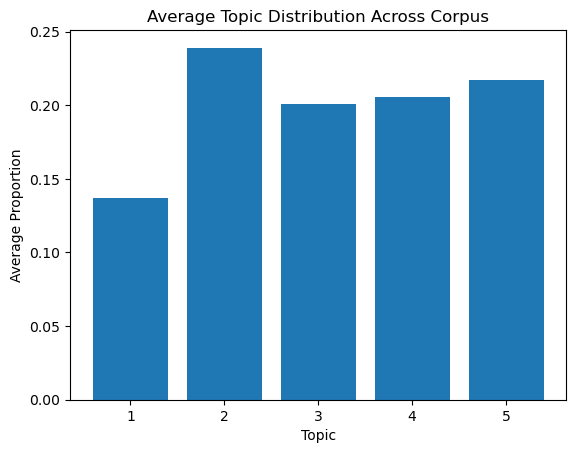

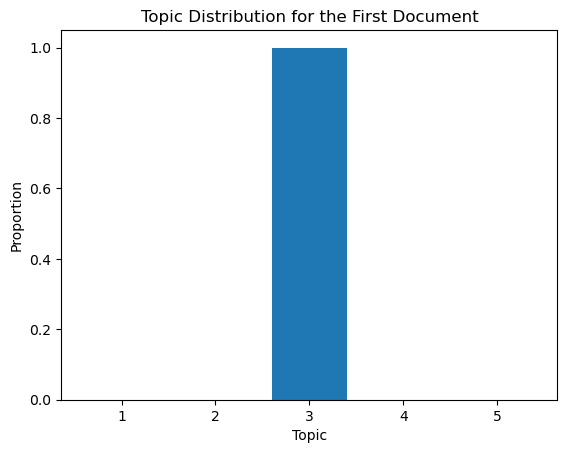

In [14]:
# Loading cleaned Sherlock Holmes texts
def load_cleaned_texts(folder_path):
    """
    Reads text files from the specified folder and returns them as a list of strings.

    """
    texts = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            texts.append(file.read())
    return texts

# Defineing the folder path for cleaned Sherlock Holmes texts
cleaned_folder_path = "C:/Users/kazan/Downloads/Sherlock Holmes Stories/cleaned_sherlock"
texts = load_cleaned_texts(cleaned_folder_path)

# Converting texts to a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)

# Fiting LDA model to extract topics
num_topics = 5  # Number of topics to extract (modifiable based on dataset)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Displaying top words for each topic
def display_topics(model, feature_names, num_top_words=10):
    """
    Displays the top words for each topic extracted by the LDA model.

    """
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)

# Analyse topic distribution for each document
topic_distributions = lda.transform(X)

# Visualise topic distribution for the entire corpus
avg_topic_distribution = np.mean(topic_distributions, axis=0)
plt.bar(range(1, num_topics + 1), avg_topic_distribution)
plt.xlabel('Topic')
plt.ylabel('Average Proportion')
plt.title('Average Topic Distribution Across Corpus')
plt.show()

# Visualise topic distribution for the first document as an example
plt.bar(range(1, num_topics + 1), topic_distributions[0])
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Topic Distribution for the First Document')
plt.show()

In [15]:
# This loop iterates through each document in the dataset and prints its topic distribution
for i, dist in enumerate(topic_distributions):
    print(f"Story {i + 1} Topic Distribution: {dist}")

Story 1 Topic Distribution: [9.79203029e-05 9.80386370e-05 9.99607934e-01 9.81324004e-05
 9.79744606e-05]
Story 2 Topic Distribution: [9.64817012e-05 9.65069511e-05 9.99614183e-01 9.63598935e-05
 9.64687946e-05]
Story 3 Topic Distribution: [9.16783057e-05 9.19500595e-05 9.18213135e-05 9.17203837e-05
 9.99632830e-01]
Story 4 Topic Distribution: [6.72681614e-05 6.72929658e-05 6.73950064e-05 6.72718383e-05
 9.99730772e-01]
Story 5 Topic Distribution: [5.92822954e-06 9.99976261e-01 5.93366563e-06 5.94145387e-06
 5.93597281e-06]
Story 6 Topic Distribution: [6.50360992e-05 9.99739476e-01 6.51190220e-05 6.51246562e-05
 6.52444146e-05]
Story 7 Topic Distribution: [7.32773868e-05 7.33988662e-05 7.33031198e-05 7.33350732e-05
 9.99706686e-01]
Story 8 Topic Distribution: [8.04080701e-05 8.04746507e-05 9.99678055e-01 8.04844874e-05
 8.05781536e-05]
Story 9 Topic Distribution: [7.73928963e-05 9.99690073e-01 7.75033813e-05 7.75525213e-05
 7.74779610e-05]
Story 10 Topic Distribution: [6.38253282e-05 9

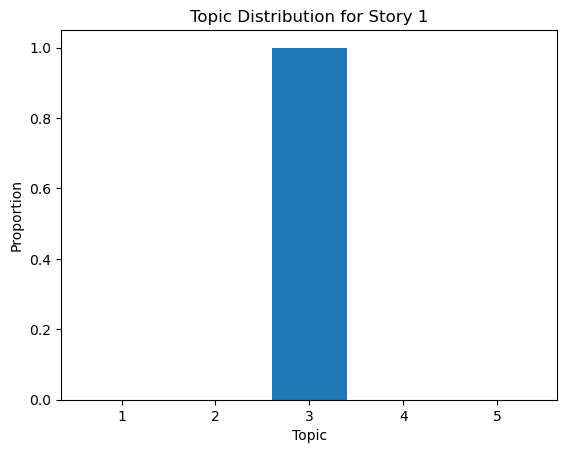

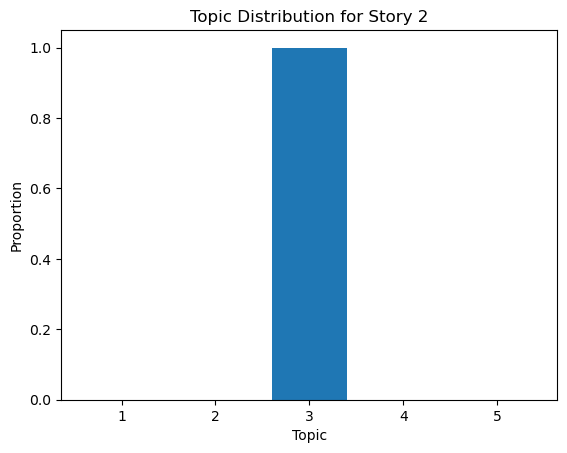

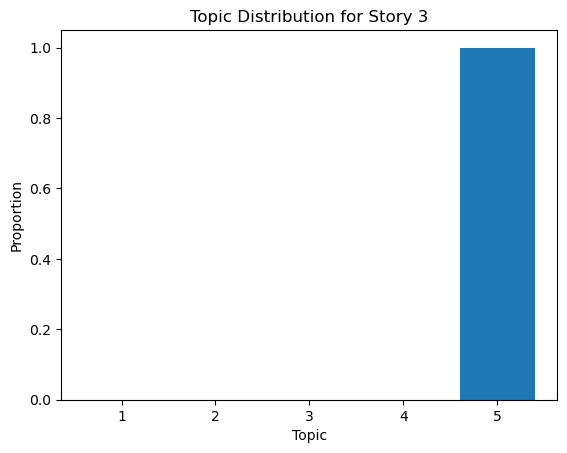

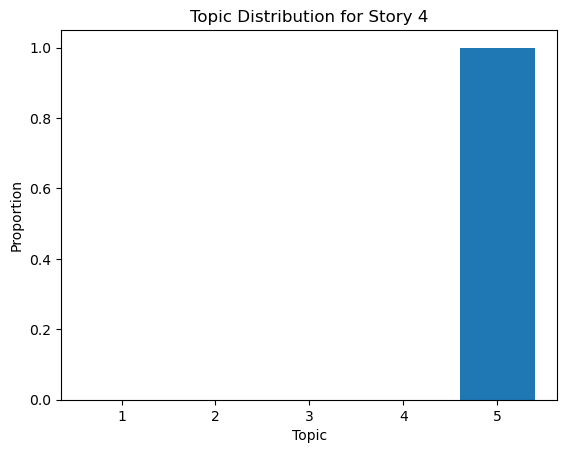

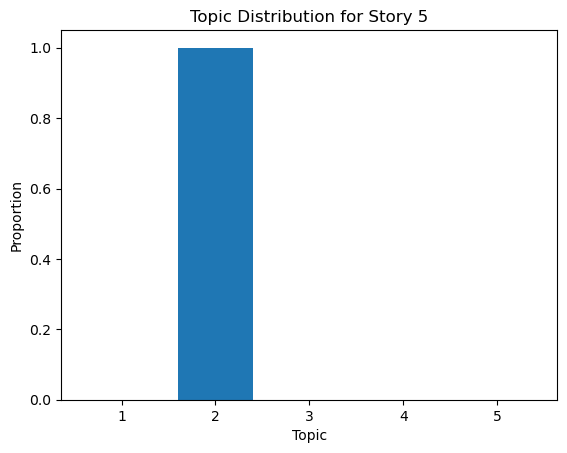

In [16]:
#  Visualises the topic distribution for the first 5 Sherlock Holmes storie
for i, dist in enumerate(topic_distributions[:5]):
    plt.bar(range(1, num_topics + 1), dist)
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(f'Topic Distribution for Story {i + 1}')
    plt.show()

In [17]:
# Computes the average topic distribution across all Sherlock Holmes stories
avg_topic_distribution = np.mean(topic_distributions, axis=0)
print("Average Topic Distribution Across Corpus:", avg_topic_distribution)

Average Topic Distribution Across Corpus: [0.13668727 0.23908183 0.20105673 0.20573867 0.2174355 ]


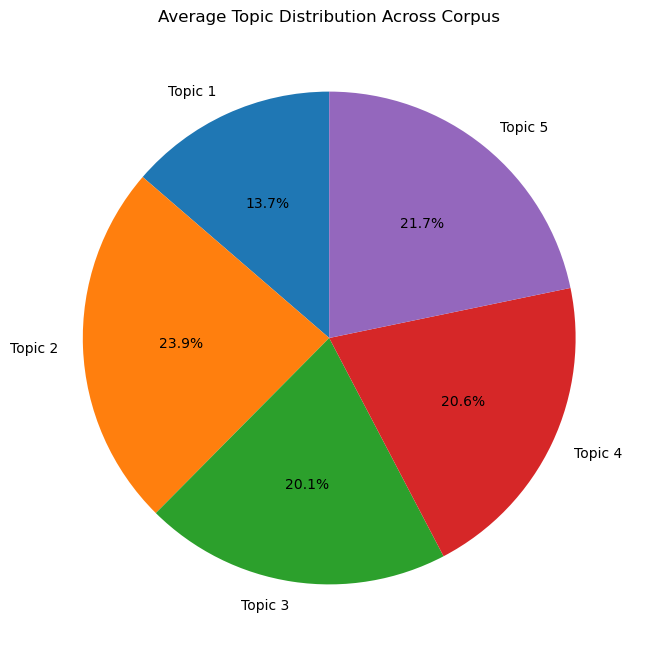

In [18]:
# Average Topic Distribution - Pie Chart
plt.figure(figsize=(8, 8))
labels = [f"Topic {i+1}" for i in range(len(avg_topic_distribution))]
plt.pie(avg_topic_distribution, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Average Topic Distribution Across Corpus')
plt.show()

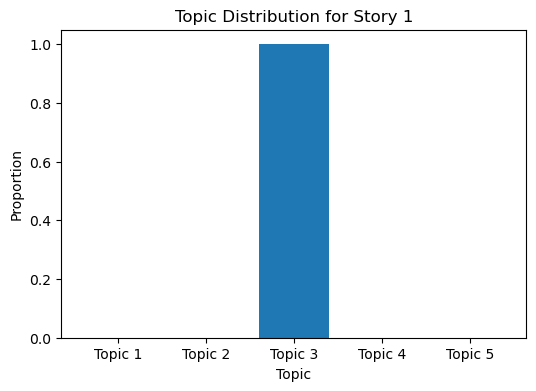

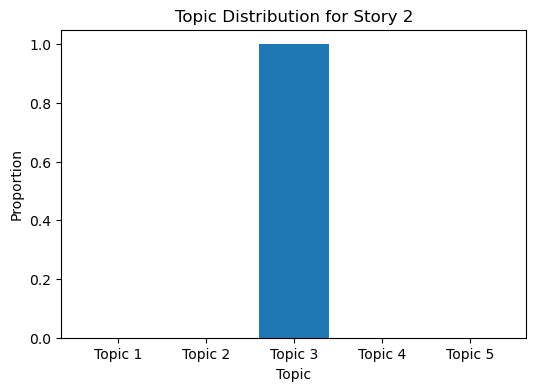

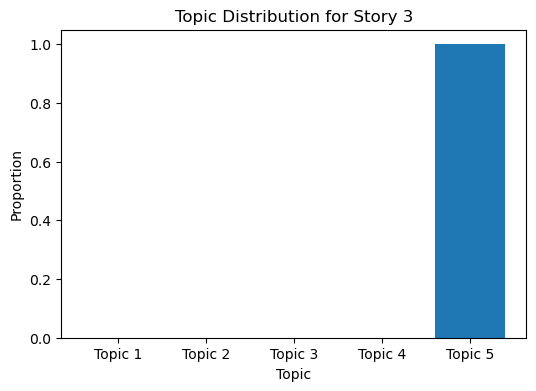

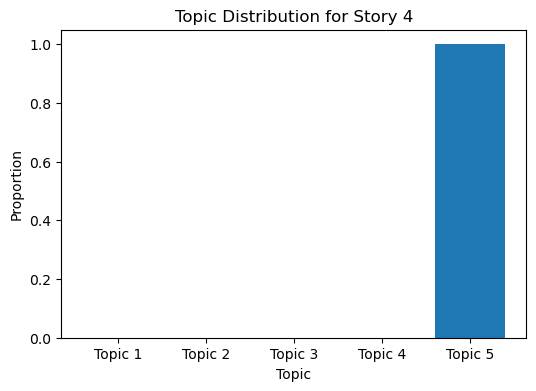

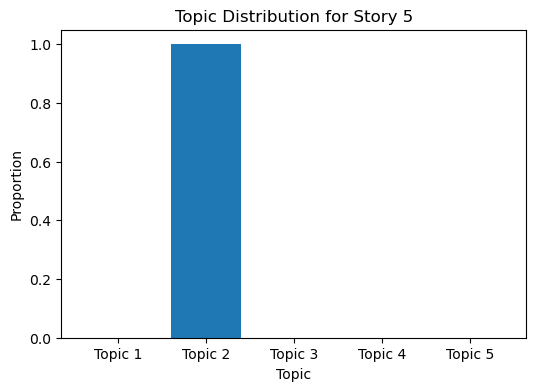

In [19]:
# Bar charts for individual stories
for i, dist in enumerate(topic_distributions[:5]):  # First 5 stories
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, len(dist) + 1), dist, tick_label=[f"Topic {j+1}" for j in range(len(dist))])
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(f'Topic Distribution for Story {i + 1}')
    plt.show()

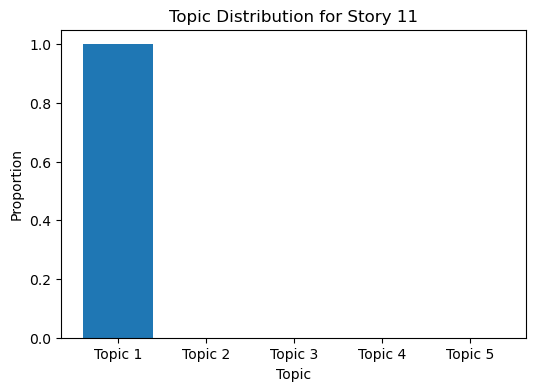

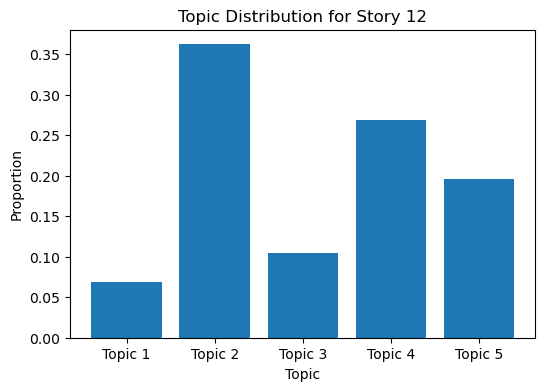

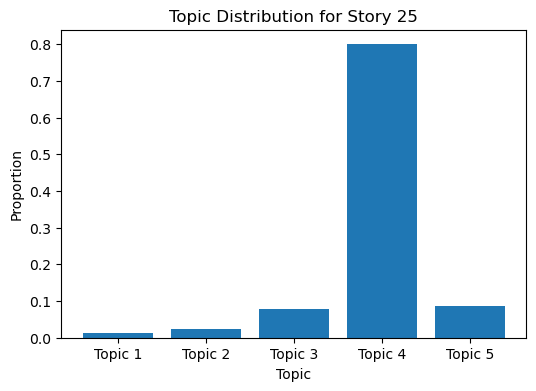

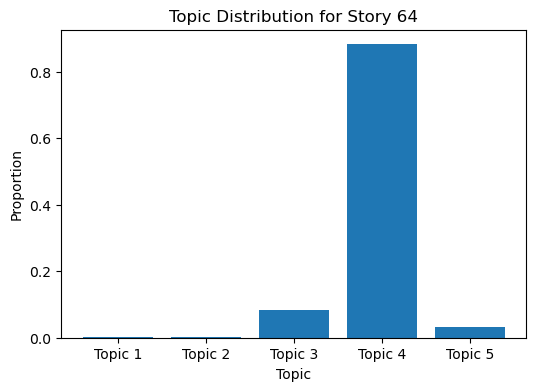

In [20]:
# Comparing topic distributions across selected stories
selected_stories = [11, 12, 25, 64]  # Example stories to compare
for story_id in selected_stories:
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, len(topic_distributions[story_id - 1]) + 1), topic_distributions[story_id - 1],
            tick_label=[f"Topic {j+1}" for j in range(len(topic_distributions[story_id - 1]))])
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(f'Topic Distribution for Story {story_id}')
    plt.show()

In [21]:
# Print average topic distribution in percentages
for i, avg in enumerate(avg_topic_distribution):
    print(f"Topic {i+1}: {avg * 100:.2f}%")

Topic 1: 13.67%
Topic 2: 23.91%
Topic 3: 20.11%
Topic 4: 20.57%
Topic 5: 21.74%


In [22]:
# Saving average topic distribution to a text file
report_file = "average_topic_distribution.txt"

with open(report_file, "w") as file:
    file.write("=== Average Topic Distribution Across Corpus ===\n")
    for i, avg in enumerate(avg_topic_distribution):
        file.write(f"Topic {i+1}: {avg * 100:.2f}% of total content\n")

print(f"\nSaved topic distribution to '{report_file}'.")


Saved topic distribution to 'average_topic_distribution.txt'.


In [23]:
# Identifying dominant topic in each story
for i, dist in enumerate(topic_distributions):
    dominant_topic = np.argmax(dist) + 1  # Adding 1 to match topic numbering
    print(f"Story {i + 1}: Dominant Topic = Topic {dominant_topic} (Proportion: {dist[dominant_topic - 1]:.4f})")

Story 1: Dominant Topic = Topic 3 (Proportion: 0.9996)
Story 2: Dominant Topic = Topic 3 (Proportion: 0.9996)
Story 3: Dominant Topic = Topic 5 (Proportion: 0.9996)
Story 4: Dominant Topic = Topic 5 (Proportion: 0.9997)
Story 5: Dominant Topic = Topic 2 (Proportion: 1.0000)
Story 6: Dominant Topic = Topic 2 (Proportion: 0.9997)
Story 7: Dominant Topic = Topic 5 (Proportion: 0.9997)
Story 8: Dominant Topic = Topic 3 (Proportion: 0.9997)
Story 9: Dominant Topic = Topic 2 (Proportion: 0.9997)
Story 10: Dominant Topic = Topic 2 (Proportion: 0.9997)
Story 11: Dominant Topic = Topic 1 (Proportion: 0.9998)
Story 12: Dominant Topic = Topic 2 (Proportion: 0.3622)
Story 13: Dominant Topic = Topic 1 (Proportion: 0.9966)
Story 14: Dominant Topic = Topic 3 (Proportion: 1.0000)
Story 15: Dominant Topic = Topic 5 (Proportion: 0.9832)
Story 16: Dominant Topic = Topic 2 (Proportion: 0.4011)
Story 17: Dominant Topic = Topic 2 (Proportion: 0.9998)
Story 18: Dominant Topic = Topic 3 (Proportion: 0.9997)
S

In [24]:
# Saving dominant topics per story to a file
dominant_topics_file = "dominant_topics_per_story.txt"

with open(dominant_topics_file, "w") as file:
    file.write("=== Dominant Topic per Story ===\n")
    for i, dist in enumerate(topic_distributions):
        dominant_topic = np.argmax(dist) + 1
        proportion = dist[dominant_topic - 1] * 100
        file.write(f"Story {i + 1}: Dominant Topic = Topic {dominant_topic} ({proportion:.2f}%)\n")

print(f"\nSaved dominant topic per story to '{dominant_topics_file}'.")


Saved dominant topic per story to 'dominant_topics_per_story.txt'.


In [25]:
# Summarise dominant topics across the corpus
dominant_topics = [np.argmax(dist) + 1 for dist in topic_distributions]
unique, counts = np.unique(dominant_topics, return_counts=True)
for topic, count in zip(unique, counts):
    print(f"Topic {topic} dominates in {count} stories ({(count / len(topic_distributions)) * 100:.2f}%)")

Topic 1 dominates in 9 stories (13.43%)
Topic 2 dominates in 17 stories (25.37%)
Topic 3 dominates in 13 stories (19.40%)
Topic 4 dominates in 14 stories (20.90%)
Topic 5 dominates in 14 stories (20.90%)
